# cpNum_rangeを固定した場合のtree値によるBug/Timeout/Nullの変化分析

このノートブックでは**cpNum_rangeを固定**して、treeの値（0, 500, 1000）によるバグ検出結果（bug、timeout、null）の変化を折れ線グラフで可視化します。

cpNum_rangeの各値（1, 50, 99）ごとに、treeの値による変化を分析します。


In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import glob

# 日本語フォント設定
plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams['font.size'] = 12


In [2]:
# treeディレクトリを検出
tree_dirs = glob.glob("Logs/tree=*")
tree_dirs.sort()

# ソートすると500と1000がひっくり返ってたのでここで反転
if len(tree_dirs) >= 3:
    tree_dirs[1], tree_dirs[2] = tree_dirs[2], tree_dirs[1]

print(f"検出されたtreeディレクトリ: {tree_dirs}\n")

# パラメータ設定
Num_params = [1, 50, 99, 200, 300, 700]  # cpNumの値
range_params = [1, 50, 99]  # cpNum_rangeの値
dir_params = [1, 2, 3, 4]  # cpNum_dirの値

# cpNum_rangeごとの結果を保存
results_by_range = {}

# 各cpNum_rangeの値ごとに処理
for fixed_range in range_params:
    print(f"\n=== cpNum_range={fixed_range} を固定して処理中 ===\n")
    results_by_tree = {}
    
    # 各treeディレクトリごとに処理
    for tree_dir in tree_dirs:
        tree_name = os.path.basename(tree_dir)
        print(f"処理中: {tree_name}")
        
        # カウンタを初期化
        bug_count = 0
        timeout_count = 0
        null_count = 0
        total = 0
        
        # 全てのcpNumの組み合わせを試す
        for idx in range(10):
            cpNum = [0] * 10
            cpNum_range = [0] * 10
            cpNum_dir = [1] * 10
            
            # cpNum_rangeを固定
            cpNum_range[idx] = fixed_range
            
            # 全てのcpNumとcpNum_dirの組み合わせを試す
            for Num in Num_params:
                for Dir in dir_params:
                    cpNum[idx] = Num
                    cpNum_dir[idx] = Dir
                    resultDirectoryName = ",".join(map(str, cpNum + cpNum_range + cpNum_dir))
                    
                    csv_path = os.path.join(tree_dir, resultDirectoryName, "detected_bugs.csv")
                    
                    if os.path.exists(csv_path):
                        with open(csv_path, "r") as csvfile:
                            reader = csv.reader(csvfile)
                            for row in reader:
                                total += 1
                                if row == ["null"]:
                                    null_count += 1
                                elif row == ["timeout"]:
                                    timeout_count += 1
                                else:
                                    bug_count += 1
        
        # 結果を保存
        results_by_tree[tree_name] = {
            'bug': bug_count,
            'timeout': timeout_count,
            'null': null_count,
            'total': total
        }
        
        print(f"  {tree_name} - Bug: {bug_count}, Timeout: {timeout_count}, Null: {null_count}, 合計: {total}")
    
    results_by_range[fixed_range] = results_by_tree

print(f"\n全処理が完了しました！")


検出されたtreeディレクトリ: ['Logs/tree=0', 'Logs/tree=500', 'Logs/tree=1000']


=== cpNum_range=1 を固定して処理中 ===

処理中: tree=0
  tree=0 - Bug: 214, Timeout: 24, Null: 962, 合計: 1200
処理中: tree=500
  tree=500 - Bug: 234, Timeout: 0, Null: 966, 合計: 1200
処理中: tree=1000
  tree=1000 - Bug: 191, Timeout: 0, Null: 1009, 合計: 1200

=== cpNum_range=50 を固定して処理中 ===

処理中: tree=0
  tree=0 - Bug: 855, Timeout: 141, Null: 204, 合計: 1200
処理中: tree=500
  tree=500 - Bug: 902, Timeout: 102, Null: 196, 合計: 1200
処理中: tree=1000
  tree=1000 - Bug: 906, Timeout: 111, Null: 183, 合計: 1200

=== cpNum_range=99 を固定して処理中 ===

処理中: tree=0
  tree=0 - Bug: 933, Timeout: 115, Null: 152, 合計: 1200
処理中: tree=500
  tree=500 - Bug: 993, Timeout: 58, Null: 149, 合計: 1200
処理中: tree=1000
  tree=1000 - Bug: 995, Timeout: 73, Null: 132, 合計: 1200

全処理が完了しました！


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

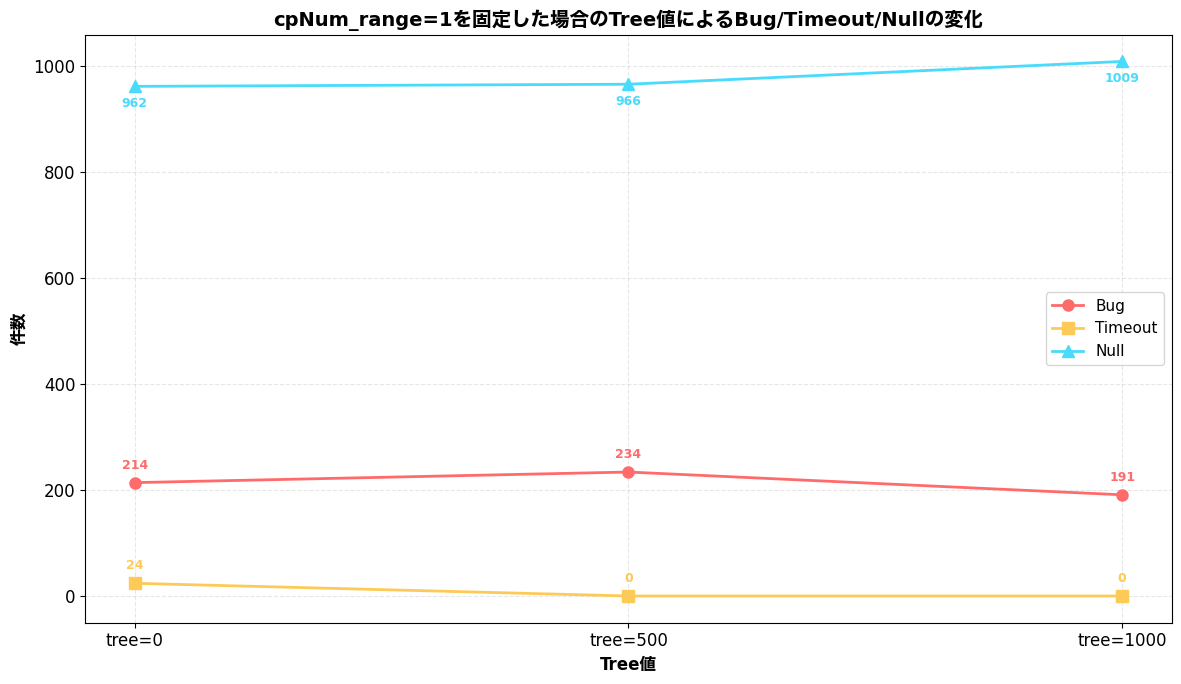

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found


=== cpNum_range=1を固定した場合のTree値による変化のサマリー ===
Tree値      Bug        Timeout    Null      
---------------------------------------------
tree=0    214        24         962       
tree=500  234        0          966       
tree=1000 191        0          1009      



findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not foun

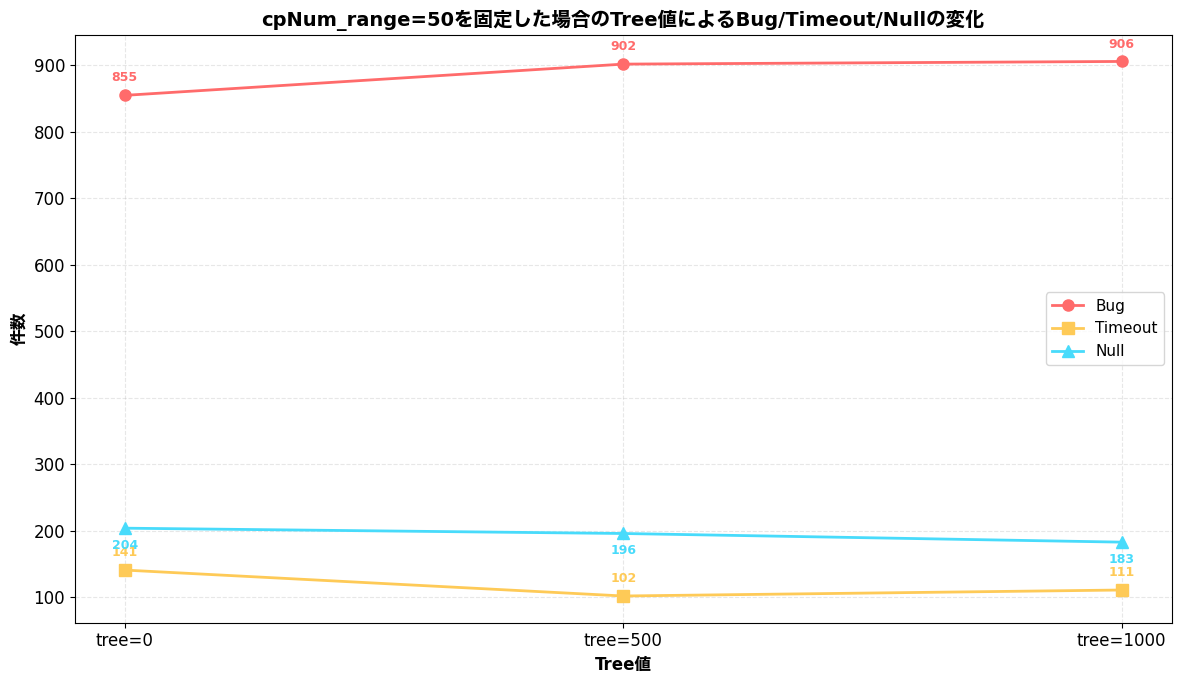

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found


=== cpNum_range=50を固定した場合のTree値による変化のサマリー ===
Tree値      Bug        Timeout    Null      
---------------------------------------------
tree=0    855        141        204       
tree=500  902        102        196       
tree=1000 906        111        183       



findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
fi

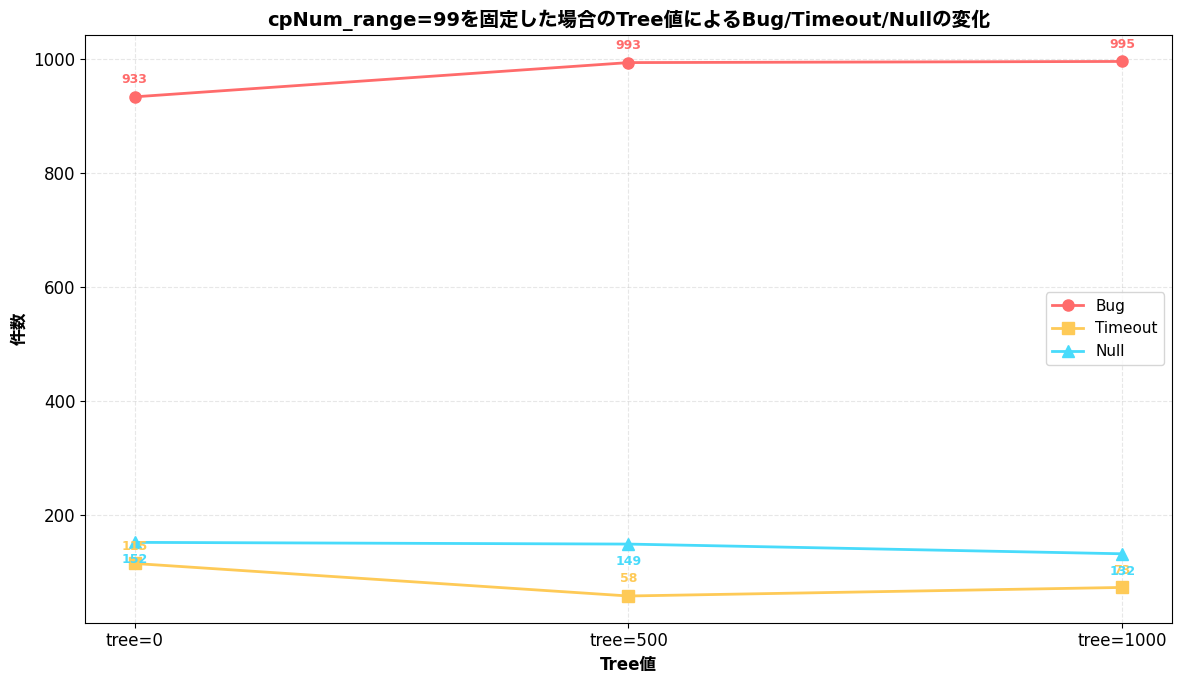


=== cpNum_range=99を固定した場合のTree値による変化のサマリー ===
Tree値      Bug        Timeout    Null      
---------------------------------------------
tree=0    933        115        152       
tree=500  993        58         149       
tree=1000 995        73         132       



In [3]:
# cpNum_rangeを固定した場合のtree値によるBug/Timeout/Nullの変化を折れ線グラフで可視化
# 各cpNum_rangeの値ごとにグラフを作成

for fixed_range in range_params:
    fig, ax = plt.subplots(figsize=(12, 7))
    
    results_by_tree = results_by_range[fixed_range]
    
    # treeの値を数値として抽出してソート
    tree_values = []
    bug_counts = []
    timeout_counts = []
    null_counts = []
    
    for tree_name, data in sorted(results_by_tree.items(), key=lambda x: int(x[0].split('=')[1])):
        tree_value = int(tree_name.split('=')[1])
        tree_values.append(tree_value)
        bug_counts.append(data['bug'])
        timeout_counts.append(data['timeout'])
        null_counts.append(data['null'])
    
    # 折れ線グラフを作成
    ax.plot(tree_values, bug_counts, marker='o', linewidth=2, markersize=8, label='Bug', color='#ff6b6b')
    ax.plot(tree_values, timeout_counts, marker='s', linewidth=2, markersize=8, label='Timeout', color='#feca57')
    ax.plot(tree_values, null_counts, marker='^', linewidth=2, markersize=8, label='Null', color='#48dbfb')
    
    # グラフの設定
    ax.set_xlabel('Tree値', fontsize=12, fontweight='bold')
    ax.set_ylabel('件数', fontsize=12, fontweight='bold')
    ax.set_title(f'cpNum_range={fixed_range}を固定した場合のTree値によるBug/Timeout/Nullの変化', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=11, loc='best')
    
    # X軸の目盛りを設定
    ax.set_xticks(tree_values)
    ax.set_xticklabels([f'tree={v}' for v in tree_values])
    
    # 各ポイントに値を表示
    for i, (bug, timeout, null) in enumerate(zip(bug_counts, timeout_counts, null_counts)):
        ax.annotate(f'{bug}', (tree_values[i], bug), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='#ff6b6b')
        ax.annotate(f'{timeout}', (tree_values[i], timeout), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='#feca57')
        ax.annotate(f'{null}', (tree_values[i], null), textcoords="offset points", 
                    xytext=(0,-15), ha='center', fontsize=9, fontweight='bold', color='#48dbfb')
    
    plt.tight_layout()
    plt.show()
    
    # データのサマリーを表示
    print(f"\n=== cpNum_range={fixed_range}を固定した場合のTree値による変化のサマリー ===")
    print(f"{'Tree値':<10} {'Bug':<10} {'Timeout':<10} {'Null':<10}")
    print("-" * 45)
    for tree_val, bug, timeout, null in zip(tree_values, bug_counts, timeout_counts, null_counts):
        print(f"tree={tree_val:<4} {bug:<10} {timeout:<10} {null:<10}")
    print()


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

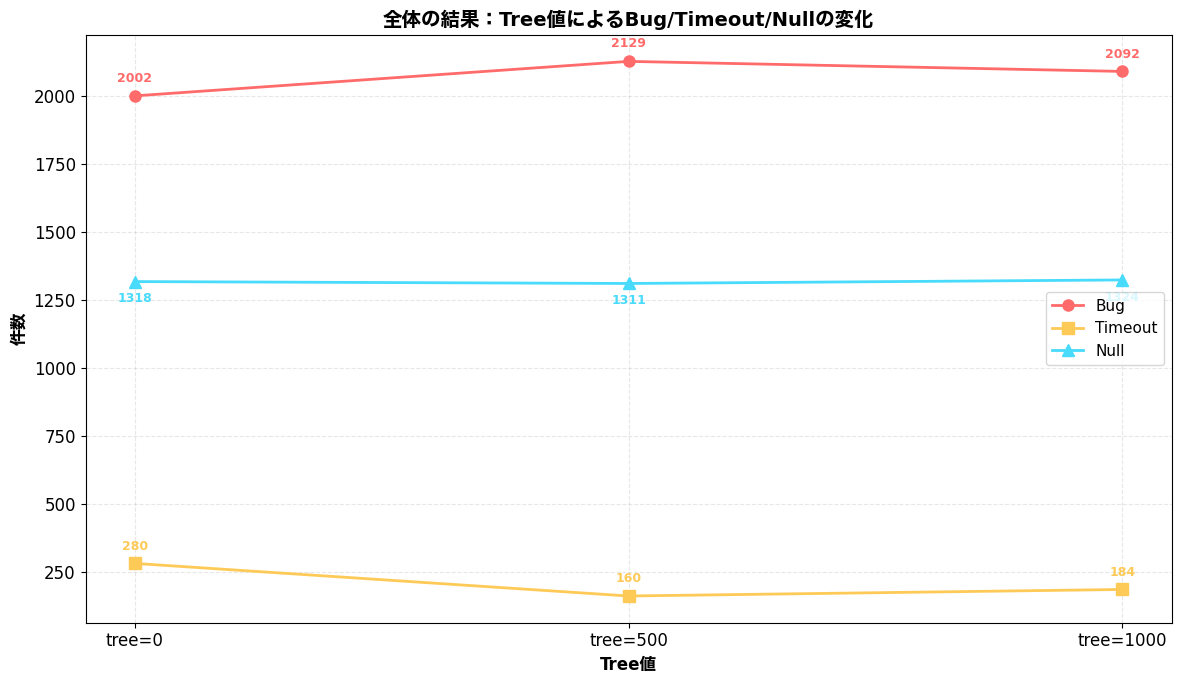


=== 全体の結果：Tree値による変化のサマリー ===
Tree値      Bug        Timeout    Null       合計        
--------------------------------------------------
tree=0    2002       280        1318       3600      
tree=500  2129       160        1311       3600      
tree=1000 2092       184        1324       3600      



In [4]:
# 全体の結果を集計（全てのcpNum_rangeを合計）
overall_results = {}

# 各treeディレクトリごとに全体の結果を集計
for tree_dir in tree_dirs:
    tree_name = os.path.basename(tree_dir)
    tree_value = int(tree_name.split('=')[1])
    
    # 全てのcpNum_rangeの結果を合計
    bug_total = 0
    timeout_total = 0
    null_total = 0
    
    for fixed_range in range_params:
        if fixed_range in results_by_range and tree_name in results_by_range[fixed_range]:
            data = results_by_range[fixed_range][tree_name]
            bug_total += data['bug']
            timeout_total += data['timeout']
            null_total += data['null']
    
    overall_results[tree_value] = {
        'bug': bug_total,
        'timeout': timeout_total,
        'null': null_total
    }

# 全体の結果を折れ線グラフで可視化
fig, ax = plt.subplots(figsize=(12, 7))

# treeの値を数値として抽出してソート
tree_values = sorted(overall_results.keys())
bug_counts = [overall_results[tree_val]['bug'] for tree_val in tree_values]
timeout_counts = [overall_results[tree_val]['timeout'] for tree_val in tree_values]
null_counts = [overall_results[tree_val]['null'] for tree_val in tree_values]

# 折れ線グラフを作成
ax.plot(tree_values, bug_counts, marker='o', linewidth=2, markersize=8, label='Bug', color='#ff6b6b')
ax.plot(tree_values, timeout_counts, marker='s', linewidth=2, markersize=8, label='Timeout', color='#feca57')
ax.plot(tree_values, null_counts, marker='^', linewidth=2, markersize=8, label='Null', color='#48dbfb')

# グラフの設定
ax.set_xlabel('Tree値', fontsize=12, fontweight='bold')
ax.set_ylabel('件数', fontsize=12, fontweight='bold')
ax.set_title('全体の結果：Tree値によるBug/Timeout/Nullの変化', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')

# X軸の目盛りを設定
ax.set_xticks(tree_values)
ax.set_xticklabels([f'tree={v}' for v in tree_values])

# 各ポイントに値を表示
for i, (bug, timeout, null) in enumerate(zip(bug_counts, timeout_counts, null_counts)):
    ax.annotate(f'{bug}', (tree_values[i], bug), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='#ff6b6b')
    ax.annotate(f'{timeout}', (tree_values[i], timeout), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='#feca57')
    ax.annotate(f'{null}', (tree_values[i], null), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9, fontweight='bold', color='#48dbfb')

plt.tight_layout()
plt.show()

# データのサマリーを表示
print(f"\n=== 全体の結果：Tree値による変化のサマリー ===")
print(f"{'Tree値':<10} {'Bug':<10} {'Timeout':<10} {'Null':<10} {'合計':<10}")
print("-" * 50)
for tree_val in tree_values:
    bug = overall_results[tree_val]['bug']
    timeout = overall_results[tree_val]['timeout']
    null = overall_results[tree_val]['null']
    total = bug + timeout + null
    print(f"tree={tree_val:<4} {bug:<10} {timeout:<10} {null:<10} {total:<10}")
print()
